# индивидуальное задание

Дано изображение.
+ Задача - применить алгоритмы обнаружения контуров с помощью методов Собеля и Робертса для выделения и обводки контуров различных объектов на изображении. 

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Загрузка изображения


In [59]:
image = cv2.imread('kis.jpg')

### с помощью метода Собеля

Преобразование в оттенки серого


In [60]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

применение фильтра Гаусса для сглаживания изображения и оператора Собеля для обнаружения границ

In [61]:
# Применение фильтра Гаусса для сглаживания изображения
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [62]:
# Применение оператора Собеля для обнаружения границ
gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.add(np.absolute(gradient_x), np.absolute(gradient_y))
gradient = gradient.astype(np.uint8)

применение пороговое значение, чтобы получить бинарное изображение с контурами

In [63]:
# Применение пороговой фильтрации для получения бинарного изображения с контурами
_, binary = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)

In [64]:
# Нахождение контуров методом cv2.findContours()
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [65]:
# Создание копии изображения для отображения контуров
contour_image = image.copy()

# Отрисовка контуров на изображении
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

array([[[158, 123,  80],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [116,  72,   0],
        [109,  70,   1],
        [105,  69,   9]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [130,  81,   5],
        [122,  80,  11],
        [119,  80,  18]],

       [[160,  94,  11],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [135,  81,   4],
        [129,  80,  10],
        [126,  82,  19]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [143, 122,  90]]

(<matplotlib.image.AxesImage at 0x1c21b27d7c0>, Text(0.5, 1.0, 'Contours'))

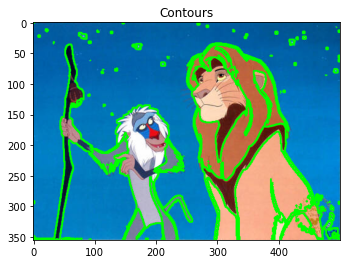

In [66]:
# Отображение изображения с контурами
contour_image = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.imshow(contour_image),plt.title("Contours")

### C помощью метода Робертса

In [68]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [69]:
# Применение оператора Робертса
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])
gradient_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
gradient_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

 Вычисление абсолютного значения градиента


In [70]:
gradient_abs = np.abs(gradient_x) + np.abs(gradient_y)


In [71]:
# Преобразование в формат uint8
gradient_abs = np.uint8(gradient_abs)

Применение пороговой фильтрации для получения бинарного изображения с контурами


In [72]:
threshold = 50
ret, thresholded_img = cv2.threshold(gradient_abs, threshold, 255, cv2.THRESH_BINARY)

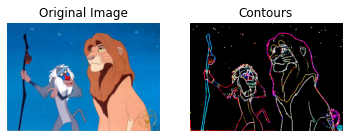

In [73]:
plt.subplot(121),plt.imshow(image),plt.title('Original Image')
plt.axis('off')
plt.subplot(122),plt.imshow(thresholded_img),plt.title('Contours')
plt.axis('off')
plt.show()